In [46]:
import random
import matplotlib.pyplot as plt
import math
import numpy as np

### Problem C

In [47]:
def simulate_game(a,b,p,N):
    q=1-p
    a_ruins=0
    b_ruins=0
    for i in range(N):
        curr_a = a
        curr_b = b
        while curr_a > 0 and curr_b > 0:
            if random.random() < p :
                curr_a+=1
                curr_b-=1
            else:
                curr_a-=1
                curr_b+=1
        if curr_a==0:
            a_ruins+=1
        else:
            b_ruins+=1
    
    p_of_ruin = a_ruins/N

    return p_of_ruin

['10', '20', '30', '40', '50', '60', '70', '80', '90']


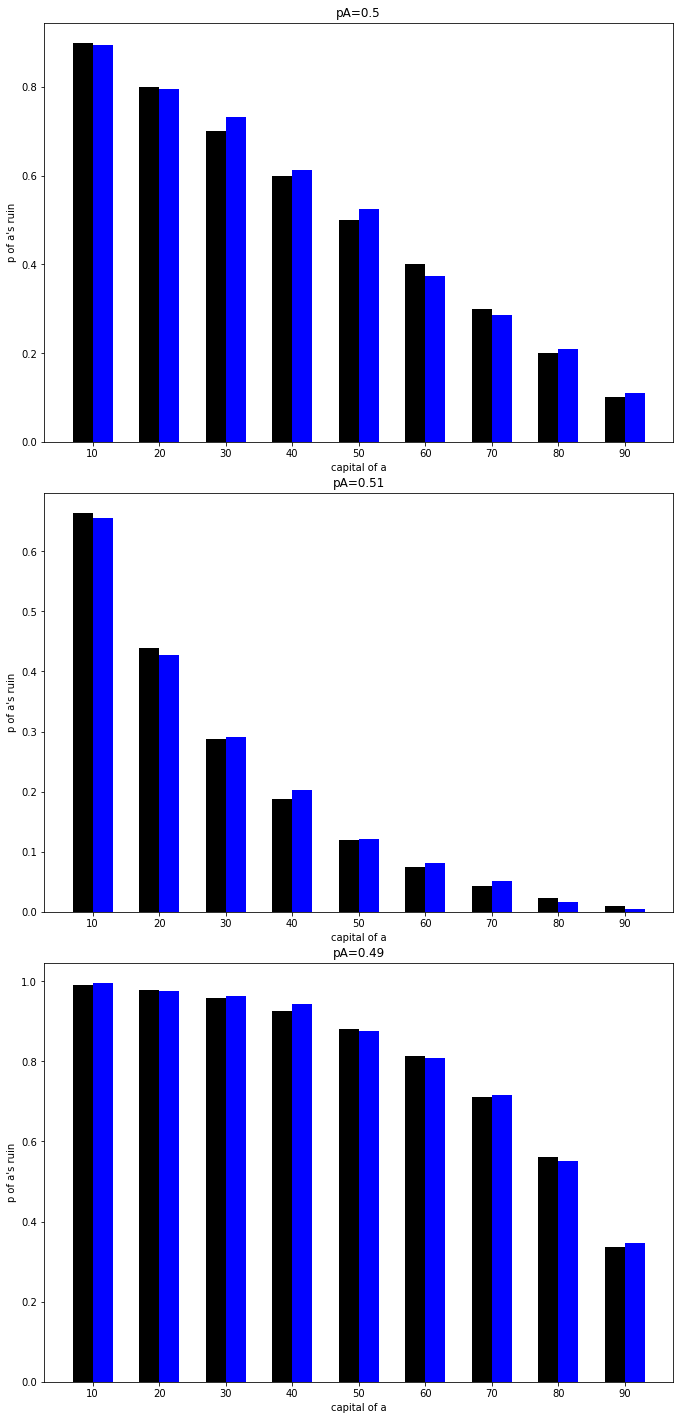

<Figure size 432x288 with 0 Axes>

In [72]:
probs=[0.49,0.5,0.51]
a_vals=range(10,100,10)
N=len(a_vals)
ind=np.arange(N)
width=0.3
labels=[str(x) for x in a_vals]
print(labels)
z=100
rounds=1000
ticks = range(len(a_vals))
fig,ax =  plt.subplots(len(probs),figsize=(10,20))
fig.tight_layout(pad=3.0)

for i in range(len(probs)):
    p=probs[i]
    q=1-p
    probs_of_ruin=[]
    probs_of_ruin_sim=[]
    capitals=[]
    for j in range(len(a_vals)):
        a=a_vals[j]
        b=z-a

        capitals.append(a)
        probs_of_ruin_sim.append(simulate_game(a,b,p,rounds))
        if p==0.5:
            probs_of_ruin.append(1-a/z)
        else:
            probs_of_ruin.append(((q/p)**a - (q/p)**z)/(1-(q/p)**z))
    
    ax[i-1].set_title("pA="+str(p))
    ax[i-1].bar(ind,probs_of_ruin, width, color = "black")
    ax[i-1].bar(ind+width,probs_of_ruin_sim, width, color = "blue")
    ax[i-1].set_xticks(ind + width / 2)
    ax[i-1].set_xticklabels(labels)
    ax[i-1].set_xlabel('capital of a')
    ax[i-1].set_ylabel("p of a's ruin")

plt.figure()
plt.show()